# Scientific Programming in Python - Control Flow & File IO

### Problem 1. FizzBuzz

>**(a)** Write a program that prints out the numbers between one and 100 except that:
* for multiples of three it prints the word Fizz instead of that number;
* for multiples of five it prints the word Buzz instead of that number; and
* for multiples of both three and five it prints the word FizzBuzz instead of that number.

>For example, the first 15 lines of output from your program should be identical to the following:

In [17]:
# Your code here
def fizzbuzz(max):
    for n in range(1,max+1):
        if (n%3) == 0 & (n%5) ==0:
            print("FizzBuzz")
        elif (n%3) == 0 :
            print("Fizz")
        elif (n%5) ==0:
            print("Buzz")
        else:
            print(n)
            
fizzbuzz(100)

1
2
FizzBuzz
4
Buzz
FizzBuzz
7
8
FizzBuzz
Buzz
11
FizzBuzz
13
14
FizzBuzz
16
17
FizzBuzz
19
Buzz
FizzBuzz
22
23
FizzBuzz
Buzz
26
FizzBuzz
28
29
FizzBuzz
31
32
FizzBuzz
34
Buzz
FizzBuzz
37
38
FizzBuzz
Buzz
41
FizzBuzz
43
44
FizzBuzz
46
47
FizzBuzz
49
Buzz
FizzBuzz
52
53
FizzBuzz
Buzz
56
FizzBuzz
58
59
FizzBuzz
61
62
FizzBuzz
64
Buzz
FizzBuzz
67
68
FizzBuzz
Buzz
71
FizzBuzz
73
74
FizzBuzz
76
77
FizzBuzz
79
Buzz
FizzBuzz
82
83
FizzBuzz
Buzz
86
FizzBuzz
88
89
FizzBuzz
91
92
FizzBuzz
94
Buzz
FizzBuzz
97
98
FizzBuzz
Buzz


>**Hint:** If you are having trouble, start by writing code that will print all the numbers one to 100, one per line. Then, modify that code so that it prints the word Fizz instead of multiples of three. Next, modify your code to prints the word Buzz instead of multiples of five. Finally, modify it so that it prints the correct output.

>**Hint:** To test if a variable <code>n</code> is a multiple of three, you can use this code:

>><code>(n % 3) == 0</code>

> The <code>%</code> symbol here is called the [modulo operator](https://en.wikipedia.org/wiki/Modulo_operation) and the code <code>n % 3</code> is pronounced "n modulo three". So if <code>n</code> is zero modulo three, it gives 0 remainder on division by three and that means it’s a multiple of 3. You can use the code like this:

>><code>if (n % 3) == 0:
    do_stuff </code>

>Here, <code>do_stuff</code> will be executed if and only if <code>n</code> is a multiple of 3.

### Problem 2. Library with File I/O

In this problem, you are given a list of student names and library fees in a file and your task is to write some Python code to process it. Make sure you download [library_data.txt](http://ucl-cs-grad.github.io/scipython/notebooks/day2/library_data.txt) from the website and put it in the same folder as your iPython notebook. The file looks something like this:

Each line in the file is a single student record. Each student record has the following format:
><code>StudentNumber FirstName LastName AmountOwed</code>

>**(a)** Write a function that uses a for-loop to iterate over each line in the file and store it in a list. The resulting list should look something like this:

In [18]:
# Your code here
def open_lib(path):
    library = []
    with open(path, "r") as lib:
        for line in lib:
            library.append(line)
    return library

path = "library_data.txt"
library = open_lib(path)
print(library)

['123456 John Doe 1.49\n', '312314 Jane Miller 0.00\n', '531337 Ted Johnson 8.12\n', '273263 Johnny Depp 0.0\n', '102931 Fred Asteir 1.20\n', '391273 Sarah Connor 10.39\n']


>**(b)** Write a function to create two lists:
>1. A list that contains only the first column (the student number)
>2. A list that contains only the remaining information (the student name and the amount of money owed to the library)

>**Hint:** You could use the string method <code>split</code> to split a string into a list of smaller strings. Read the help for this function if needed.

In [19]:
# Your code here
def studentnumber_remain(data):
    num = []
    remain = []
    for i in data:
        num.append(i.split(" ")[0])
        remain.append(i.split(" ")[1:])
    return num, remain
    
lib_num, lib_remain = studentnumber_remain(library)
print(lib_num)
print(lib_remain)

['123456', '312314', '531337', '273263', '102931', '391273']
[['John', 'Doe', '1.49\n'], ['Jane', 'Miller', '0.00\n'], ['Ted', 'Johnson', '8.12\n'], ['Johnny', 'Depp', '0.0\n'], ['Fred', 'Asteir', '1.20\n'], ['Sarah', 'Connor', '10.39\n']]


>**(c)** Write a function that splits the second list futher into two lists:
>1. A list that contains the name
>2. A list that contains the amount owed (as a float)

In [20]:
# Your code here
def name_owed(data):
    name = []
    owed = []
    for i in data:
        name.append(" ".join(i[:2]))
        owed.append(float(i[-1]))
    return name, owed
    
lib_name, lib_owed = name_owed(lib_remain)
print(lib_name)
print(lib_owed)

['John Doe', 'Jane Miller', 'Ted Johnson', 'Johnny Depp', 'Fred Asteir', 'Sarah Connor']
[1.49, 0.0, 8.12, 0.0, 1.2, 10.39]


>**(d)** Write a function that determines the name and student number of the person that owes the largest amount of money.

In [21]:
# Your code here
def max_owed(data):
    max_index = 0
    for i, amount in enumerate(data):
        if amount > data[max_index]:
            max_index = i
            
    return max_index

max_index = max_owed(lib_owed)
print(lib_name[max_index], lib_num[max_index])

Sarah Connor 391273


>**(e)** Write a function that determines the names and student numbers of all people that owe money (i.e. where the amount is not 0.00).

In [22]:
# Your code here
def owed_list(name, num, owed):
    owed_people = []
    for i, amount in enumerate(owed):
        owed_person = []
        if amount > 0:
            owed_person.append(name[i])
            owed_person.append(num[i])
            owed_people.append(owed_person)
    return owed_people

owed_people = owed_list(lib_name, lib_num, lib_owed)
print(owed_people)

[['John Doe', '123456'], ['Ted Johnson', '531337'], ['Fred Asteir', '102931'], ['Sarah Connor', '391273']]


>**(f)** We will now write our results to a new file. Write some code that:
> 1. lets the user enter a file name;
> 2. creates this file; and
> 3. writes to the file the list of people that owe money (e.g. one student per line, with how much they owe as well).

In [24]:
# Your code here
file_name = input("enter a file name: ")

path = "library_data.txt"
def create_library_file(file_name):
    library = open_lib(path)
    lib_num, lib_remain = studentnumber_remain(library)
    lib_name, lib_owed = name_owed(lib_remain)
    owed_people = owed_list(lib_name, lib_num, lib_owed)
    with open(file_name, "w") as f:
        for record in owed_people:
            records = ''
            for elements in record:
                records = records + str(elements) + " "
            f.write(records)
            
create_library_file(file_name)

enter a file name: creatingdata


In [25]:
with open("creatingdata", "r") as f:
    lines = f.readlines()
print(lines)

['John Doe 123456 Ted Johnson 531337 Fred Asteir 102931 Sarah Connor 391273 ']


### Problem 3. FizzBuzz (applied science version)

Imagine that you are doing a psychology experiment in which your colleague records the response time of participants presented with some task. There are two task conditions: condition A and condition B. There are n participants, and they each do the task with condition A and then with condition B. The instrument used to record the response times stores the information in a long text file called response_time.txt (which you can get [here](http://ucl-cs-grad.github.io/scipython/notebooks/day2/response_time.txt)). The first line of the file is the response time of the first participant doing the task with condition A, the second line is the response time of the first participant with condition B, the third line is the response time of the second participant doing the task with condition A, and so on.

>**(a)** Download [response_time.txt](http://ucl-cs-grad.github.io/scipython/notebooks/day2/response_time.txt) and then write a program which prints the mean response time of all participants for task A followed by the mean response time for all participants for task B. The output of your program should be the following:

>**Hint:** The modulo operator should come in handy again. Any appropriately indented code following <code> if (n % 2) == 0: </code> will only be executed if <code>n</code> is even.

In [26]:
# Your code here
path = "response_time.txt"
def AB_response(path):
    A = []
    B = []
    with open(path, "r") as f:
        for i, line in enumerate(f):
            if (i%2) == 0:
                A.append(float(line))
            else:
                B.append(float(line))
        return A, B
                           
condition_A, condition_B = AB_response(path)
mean_A = sum(condition_A)/len(condition_A)
mean_B = sum(condition_B)/len(condition_B)
print(mean_A)
print(mean_B)

4.987045797946349
3.1046195690006404


>**(b)** Extend your script so that it displays a box plot of the response times of the participants for the two conditions.

>**Hint:**  If you create two lists, called <code>condition_A</code> and <code>condition_B</code>, containing the response times for conditions A and B respectively, then the <code>boxplot</code> function from matplotlib will generate the actual boxplot:
>><code>boxplot( [condition_A, condition_B] )</code>.

{'whiskers': [<matplotlib.lines.Line2D at 0x1fdaec72908>,
 'caps': [<matplotlib.lines.Line2D at 0x1fdaec7ca08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fdaec63e08>,
 'medians': [<matplotlib.lines.Line2D at 0x1fdaec81b08>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fdaec81c08>,
 'means': []}

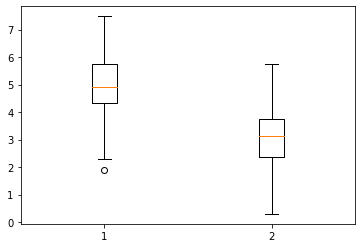

In [27]:
# Your code here
path = "response_time.txt"
def AB_response(path):
    A = []
    B = []
    with open(path, "r") as f:
        for i, line in enumerate(f):
            if (i%2) == 0:
                A.append(float(line))
            else:
                B.append(float(line))
        return A, B
                           
condition_A, condition_B = AB_response(path)

%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot([condition_A, condition_B])

### Problem 4. Who’s the winner?

The London elections are around the corner and you have been tasked with writing the code that determines the winner given all the ballots. The winner is determined as follows:

* From the list of candidates (which we will for simplicity number $0,1,2,...$ ), every voter gets to select his first and his second choice. The data you are given can thus be represented as a list of lists:

><code>[ [1st_choice_voter_1, 2nd_choice_voter_1], [1st_choice_voter_2, 2nd_choice_voter_2], ...]</code>

* If any of the candidates gets more than 50% of the first votes, he is declared the winner.


* If no candidate achieves this absolute majority, the two candidates with the most first votes enter into a second round, all others are eliminated.  


* In the second round, all ballots with first votes for candidates that did not enter the second round are re-examined, and any second choice votes for the top two candidates are added to their scores.  


* The candidate with the highest number of combined first and second choice votes is the winner.  

>**(a)** Download the file [votes.pickle](ucl-cs-grad.github.io/scipython/notebooks/day2/votes.pickle) from the course website. Then, use the following code to read the list of votes from the file:

In [28]:
from pickle import * 

votes = load(open("votes.pickle", "rb") )
votes

[(0, 2),
 (0, 4),
 (1, 0),
 (5, 2),
 (4, 2),
 (2, 1),
 (3, 2),
 (3, 1),
 (2, 1),
 (5, 2),
 (5, 1),
 (5, 1),
 (0, 2),
 (4, 2),
 (4, 2),
 (4, 1),
 (5, 3),
 (5, 2),
 (5, 2),
 (3, 5),
 (4, 2),
 (1, 2),
 (4, 2),
 (2, 2),
 (1, 2),
 (0, 5),
 (4, 2),
 (5, 2),
 (3, 2),
 (2, 2),
 (4, 2),
 (1, 3),
 (4, 1),
 (5, 1),
 (1, 2),
 (1, 5),
 (0, 3),
 (1, 2),
 (1, 2),
 (5, 5),
 (5, 1),
 (4, 2),
 (5, 1),
 (2, 4),
 (2, 1),
 (2, 5),
 (1, 2),
 (5, 2),
 (0, 1),
 (1, 2),
 (5, 5),
 (5, 2),
 (5, 4),
 (0, 3),
 (1, 2),
 (1, 2),
 (0, 2),
 (2, 2),
 (5, 5),
 (5, 0),
 (4, 1),
 (1, 1),
 (5, 1),
 (5, 2),
 (5, 1),
 (5, 3),
 (1, 2),
 (5, 2),
 (0, 4),
 (2, 2),
 (1, 4),
 (1, 2),
 (5, 1),
 (0, 2),
 (3, 1),
 (3, 0),
 (5, 1),
 (3, 2),
 (2, 1),
 (2, 2),
 (3, 1),
 (1, 1),
 (1, 1),
 (1, 3),
 (4, 2),
 (1, 1),
 (2, 2),
 (5, 2),
 (2, 2),
 (1, 3),
 (2, 1),
 (4, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (4, 2),
 (3, 2),
 (4, 0),
 (1, 2),
 (1, 1),
 (5, 2),
 (2, 1),
 (5, 1),
 (2, 2),
 (1, 2),
 (1, 1),
 (4, 1),
 (1, 1),
 (4, 1),
 (2, 4),
 

>**(b)** Fill in the code required to count the first votes and to determine the possible first-round winner. There are 6 candidates in the given data set. You should find that in this data set no candidate wins in the first round.

In [29]:
num_candidates = 6

# create a list to store the number of votes per candidate
first_votes = [0] * num_candidates

# go through the list of votes and add up the first votes per candidate

### YOUR CODE HERE ###
for first, second in votes:
    first_votes[first] += 1
print(first_votes)

# in the first round, if any candidate has > 50% of the votes, he wins

### YOUR CODE HERE ###
for i in range(len(first_votes)):
    if first_votes[i] >= sum(first_votes)*0.5:
        print("{0}번 후보자가 첫 라운드에서 당선되었습니다.".i)

[10010, 26969, 23130, 4959, 14848, 20084]


>**(c)** Implement the second round process described above. If you do this correctly, you should find that candidate 2 wins with 45619 votes. There are some hints in the skeleton below to get you started

In [30]:
# For the elimination round, we need to find the two candidates with the most first votes.
# The code below does just that: It returns a tuple of the indices of the 
# top two candidates. Don't worry if you don't understand how this works yet --
# we will see a much simpler and more elegant way to achieve the same later in the course.
elimination_candidates  = list( zip ( *sorted( zip( first_votes, range( len(first_votes) ) ) )[-2:] ))[1]
print(elimination_candidates)
# make a copy so we can add votes
second_votes = first_votes[:]

# add second votes to first votes for remaining candidates

### YOUR CODE HERE ###
for first, second in votes:
    if (first not in elimination_candidates) and (second in elimination_candidates):
        if first != second:
            second_votes[second] += 1

print(second_votes)

# find and display the winner
# you can either try to adapt the code used to find the top two candidates above, 
# or simply use another for loop

### YOUR CODE HERE ###
for i, vote in enumerate(second_votes):
    if vote == max(second_votes):
        win = i
        win_vote = vote
print("{0}번 후보자가 {1}표로 최종 당선되었습니다.".format(win, win_vote))

(2, 1)
[10010, 44374, 45619, 4959, 14848, 20084]
2번 후보자가 45619표로 최종 당선되었습니다.


### Problem 5. Text processing for Alice in Wonderland

The following code will create a file called alice.txt that contains the text of Alice in Wonderland. The code below will create the file in iPython’s current directory. This is the same as going to the website http://www.guttenberg.org/, finding the .txt file for Alice in Wonderland, and clicking *File* and then *Save as* and entering ‘alice.txt’ into the save dialog of your browser. The advantage of knowing how to do this in python is that you can then write a script to automatically download the data that you need for an experiment, which will save you time when there are a lot of files.

In [31]:
import urllib.request

# URL on guttenberg.org
#URL = "http://www.gutenberg.org/files/11/11.txt" ## HTTP 에러

# Local URL on UCL webserver
URL = "http://ucl-cs-grad.github.io/scipython/notebooks/day2/alice.txt"

local_filename, headers = urllib.request.urlretrieve(URL)
f = open(local_filename)
open("alice.txt", "w").write(f.read())

163810

>**(a)** Open up the file ‘alice.txt’ in a text editor of your choice (e.g. Notepad on Windows or TextEdit on Mac). There might be some text at the beginning or the end that isn’t part of Alice in Wonderland. Delete it and then save the file again.

>**(b)** The following code will count the number of words in Alice in Wonderland. Modify the code so that it prints out the number of times the word Alice appears.

In [32]:
f = open("alice.txt", "r")
num_words = 0

for line in f.readlines():
    for word in line.strip().split():
        if word == "Alice":
            num_words += 1 

print(num_words)

221


We will revisit this exercise later when dictionaries have been introduced to analyse the frequency of all words!

### Problem 6. Cryptograms

The code below ‘encrypts’ some text by rotating the alphabet by a given amount:

In [5]:
amount = int( input('What amount do you want to rotate by? ') )

print('Enter text to be rotated.')
print('Enter "EOF" on a line on its own when you are done.')

A_value = ord('A')
Z_value = ord('Z')

while True:
    input_line = input()
    
    if input_line == 'EOF':
        break

    output_line = ''

    for c in input_line:
        if c.isalpha():
            c = c.upper()
            value = ord(c)
            value = value + amount
            
            if value > Z_value:
                value = A_value + (value - Z_value) - 1
            elif value < A_value:
                value = Z_value - (A_value - value) + 1

            c = chr(value)

        output_line += c

    print(output_line)

What amount do you want to rotate by? 5
Enter text to be rotated.
Enter "EOF" on a line on its own when you are done.
hello
MJQQT
eof
JTK
EOF


>**(a)** If you encrypt some text by rotating some amount, what amount do you need to rotate by to decrypt it?

더해준 만큼 빼줘야 한다. 자기 자신으로 돌아오기 위해 더해줘야 하는 수가 26이므로 (26 - 암호화 횟수) 만큼 더해주면 디코딩 할 수 있다.


위의 예제의 경우, 5를 더해주었으므로, 26-5=21을 더해주면 다시 원래 문자를 찾을 수 있다.

>**(b)** Encrypt some text and email it to the person next to you. Tell them what amount you rotated by so they can decrypt it.

>**(c)** Figure out what <code>ord</code> and <code>chr</code> do

In [52]:
print(A_value)
print(Z_value)
print(ord('a'))
print(ord('z'))
print(chr(A_value))

65
90
97
122
A


ord 함수는 해당 알파벳을 특정 인덱스로 바꿔주고, chr 함수는 해당 인덱스가 가리키는 알파벳을 돌려준다.

>**(d)** Do you understand the bit where it wraps around by checking if it’s moved past ‘A’ or ‘Z’?

'Z'를 넘어서면 다시 'A'로 연결될 수 있도록 rotating number에 26 ( = ord('Z') - ord('A') + 1)을 빼주거나, 'A' 아래의 경우에는 'Z'로 연결될 수 있도록 26을 더해준다.

In [6]:
ord('Z') - ord('A') + 1

26

>**(e)** What does this part of the code do:

>><code>while True:
    input_line = input()
    if input_line == "EOF":
        break</code>

암호화시키고자 하는 텍스트를 입력받는다. 이때, 입력받은 텍스트가 "EOF"인 경우, 이 프로그램을 종료시킨다.

>**(f)** You should notice that our program converts lower case to upper case letters as a side effect as it rotates. Change it so that it doesn’t convert lower case to upper case (instead preserving the case of the letters) but still rotates them.

In [16]:
amount = int( input('What amount do you want to rotate by? ') )

print('Enter text to be rotated.')
print('Enter "EOF" on a line on its own when you are done.')

A_value = ord('A')
Z_value = ord('Z')

while True:
    input_line = input()
    
    if input_line == 'EOF':
        break

    output_line = ''
    
    for c in input_line:
        if c.isalpha():
            c_new = c.upper()
            value = ord(c_new)
            value = value + amount
            
            if value > Z_value:
                value = A_value + (value - Z_value) - 1
            elif value < A_value:
                value = Z_value - (A_value - value) + 1

            c_new = chr(value)

        if c.islower():
            output_line += c_new.lower()
        else:
            output_line += c_new

    print(output_line)

What amount do you want to rotate by? 5
Enter text to be rotated.
Enter "EOF" on a line on its own when you are done.
Abc
Fgh
HelLo
MjqQt
xyZ
cdE
EOF
